In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler

### Import dataset

In [232]:
file_name = 'iris.txt'
dataset = pd.read_csv(file_name, header=None)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,4.6,3.4,1.4,0.3,1


### Feature Scaling


In [233]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

### Parameters

In [234]:
rows = 8
cols = 8
no_of_features = X.shape[1]
no_of_epoches = 20
no_of_iterations = 200
learning_rate_range = (0.5, 0.01)
initial_radius = max(rows, cols)/2

In [235]:
### Function Declaration

def euclidian_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def get_closest_node(data_point, som_map):
    h, w = som_map.shape[:2]
#     print("SOM {} {}".format(w, h))
    smallest_dist = 1000000000
    position = [None, None]
    for i in range(h):
        for j in range(w):
            dist = euclidian_distance(som_map[i][j], data_point)
            if dist < smallest_dist:
                smallest_dist = dist
                position = np.array([i, j])
    return position

def get_current_lr(iteration):
    return learning_rate_range[0] + (learning_rate_range[1] - learning_rate_range[0])* (iteration/no_of_iterations)

def get_current_radius(iteration):
    return initial_radius*math.exp(-iteration/no_of_iterations)

### SOM Training

In [236]:
som_map = np.random.uniform(size=(rows,cols,no_of_features))
prev_som_map = np.zeros((rows,cols,no_of_features))
convergence = []
pre_cost = 100
for _iter in range(no_of_iterations):
    current_learning_rate = get_current_lr(_iter)
    current_radius = get_current_radius(_iter)
#     print("Current LR: {}".format(current_learning_rate))
#     print("Current Radius: {}".format(current_radius))
    J = np.linalg.norm(som_map - prev_som_map)
    randomly_selected_data = X[np.random.randint(len(X))]
    bmu_index = get_closest_node(randomly_selected_data, som_map)
    prev_som_map = np.copy(som_map)
    
    for col in range(cols):
        for row in range(rows):
#             print(row, col)
            som_distance = euclidian_distance(bmu_index, np.array([row, col]))
            if som_distance <= current_radius:
                som_map[row][col] = som_map[row][col] + current_learning_rate * ( randomly_selected_data - som_map[row][col])
    if pre_cost > J:
        print("New optimum point found, iter {} cost: {}".format(_iter, J))
        pre_cost = J
    convergence.append(J)

# print(convergence)
    

New optimum point found, iter 0 cost: 9.057429871662814
New optimum point found, iter 1 cost: 2.8687971615053276
New optimum point found, iter 2 cost: 1.9024747143819785
New optimum point found, iter 3 cost: 1.048724622450695
New optimum point found, iter 7 cost: 0.989165705118264
New optimum point found, iter 8 cost: 0.7024290491311932
New optimum point found, iter 16 cost: 0.3285274151710763
New optimum point found, iter 24 cost: 0.3218453983686214
New optimum point found, iter 59 cost: 0.24563411213938977
New optimum point found, iter 64 cost: 0.2206220290588103
New optimum point found, iter 74 cost: 0.13593922911297016
New optimum point found, iter 98 cost: 0.10128048530142225
New optimum point found, iter 126 cost: 0.09622390144527655
New optimum point found, iter 129 cost: 0.07242361376986828
New optimum point found, iter 137 cost: 0.05471382263840956
New optimum point found, iter 140 cost: 0.05066501015322688
New optimum point found, iter 142 cost: 0.04455328856143909
New optimu

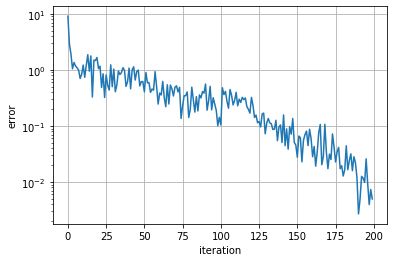

<Figure size 1440x1440 with 0 Axes>

Final error: 0.004988183897512786


In [237]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('iteration')
plt.grid(True)
plt.yscale('log')
plt.figure(figsize = (20,20))
plt.show()
# print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Red = Class 1
Blue = Class 2
Green = Class 3


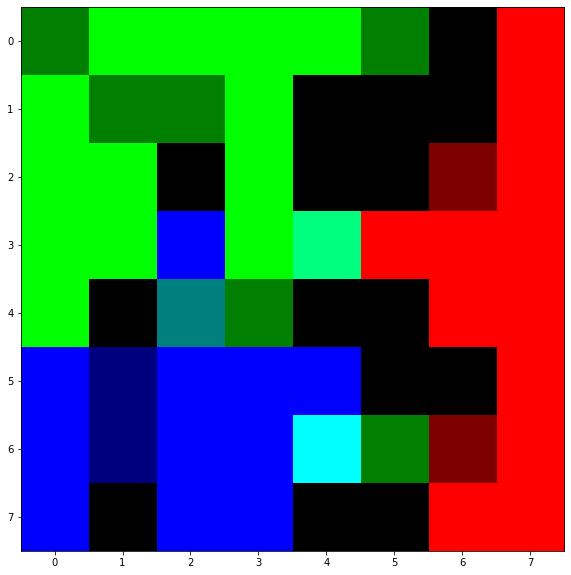

In [238]:
# from scipy.misc import toimage
from PIL import Image


BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([rows,cols,3],dtype=np.float32)

i=0
for i, pattern in enumerate(X):
    BMU = get_closest_node(pattern, som_map)
    
    row = BMU[0]
    col = BMU[1]
    
    if y[i] == 1:
        if result_map[row][col][0] <= 0.5:
            result_map[row][col] += np.asarray([0.5,0,0])
    elif y[i] == 2:
        if result_map[row][col][1] <= 0.5:
            result_map[row][col] += np.asarray([0,0.5,0])
    elif y[i] == 3:
        if result_map[row][col][2] <= 0.5:
            result_map[row][col] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
print("Red = Class 1")
print("Blue = Class 2")
print("Green = Class 3")

plt.figure(figsize = (10,10))
plt.imshow(result_map, interpolation='nearest')